# Imports

In [1]:
#Data Manipulation Librairies
import pandas as pd
from pandas.plotting import scatter_matrix, andrews_curves

from datetime import datetime

import numpy as np
import scipy.stats as st
import scipy

from sklearn.externals import joblib

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import plotly as py
import plotly.express as px
import plotly.figure_factory as ff
import plotly.offline as pyoff
import cufflinks as cf


import math
import csv

Axes3D

mpl_toolkits.mplot3d.axes3d.Axes3D

In [2]:
from time import time, sleep
from IPython import get_ipython
from IPython.display import Audio, display, HTML
from ipywidgets import IntProgress

class Beeper:

    def __init__(self, threshold, **audio_kwargs):
        self.threshold = threshold
        self.start_time = None    # time in sec, or None
        self.audio = audio_kwargs

    def pre_execute(self):
        if not self.start_time:
            self.start_time = time()
            

    def post_execute(self):
        end_time = time()
        if self.start_time and end_time - self.start_time > self.threshold:
            audio = Audio(**self.audio, autoplay=True)
            display(audio)
            print((end_time - self.start_time)/60, " minutes.")
        self.start_time = None

beeper = Beeper(5, filename='beep-07.wav')

ipython = get_ipython()
ipython.events.register('pre_execute', beeper.pre_execute)
ipython.events.register('post_execute', beeper.post_execute)



In [3]:
#1000163 rows × 5 columns
#['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng','geolocation_city', 'geolocation_state']
Df_geolocation = pd.read_csv(
    "./brazilian-ecommerce/olist_geolocation_dataset.csv",
    engine="python",
    sep=',',
    decimal='.')

#99441 rows × 5 columns
#['customer_id', 'customer_unique_id', 'customer_zip_code_prefix','customer_city', 'customer_state']
Df_customers = pd.read_csv("./brazilian-ecommerce/olist_customers_dataset.csv",
                           engine="python",
                           sep=',',
                           decimal='.')

#99441 rows × 8 columns
#['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp','order_approved_at', 'order_delivered_carrier_date','order_delivered_customer_date', 'order_estimated_delivery_date']
Df_orders = pd.read_csv("./brazilian-ecommerce/olist_orders_dataset.csv",
                        engine="python",
                        sep=',',
                        decimal='.')

#112650 rows × 7 columns
#['order_id', 'order_item_id', 'product_id', 'seller_id','shipping_limit_date', 'price', 'freight_value']
Df_order_items = pd.read_csv(
    "./brazilian-ecommerce/olist_order_items_dataset.csv",
    engine="python",
    sep=',',
    decimal='.')

#103886 rows × 5 columns
#['order_id', 'payment_sequential', 'payment_type','payment_installments', 'payment_value']
Df_order_payments = pd.read_csv(
    "./brazilian-ecommerce/olist_order_payments_dataset.csv",
    engine="python",
    sep=',',
    decimal='.')

#100000 rows × 7 columns
#['review_id', 'order_id', 'review_score', 'review_comment_title','review_comment_message', 'review_creation_date','review_answer_timestamp']
Df_order_reviews = pd.read_csv(
    "./brazilian-ecommerce/olist_order_reviews_dataset.csv",
    engine="python",
    sep=',',
    decimal='.')

#32951 rows × 9 columns
#['product_id', 'product_category_name', 'product_name_lenght','product_description_lenght', 'product_photos_qty', 'product_weight_g','product_length_cm', 'product_height_cm', 'product_width_cm']
Df_products = pd.read_csv("./brazilian-ecommerce/olist_products_dataset.csv",
                          engine="python",
                          sep=',',
                          decimal='.')

#3095 rows × 4 columns
#['seller_id', 'seller_zip_code_prefix', 'seller_city', 'seller_state']
Df_sellers = pd.read_csv("./brazilian-ecommerce/olist_sellers_dataset.csv",
                         engine="python",
                         sep=',',
                         decimal='.')

#71 rows × 1 columns
#['product_category_name']
Df_product_translation = pd.read_csv(
    "./brazilian-ecommerce/product_category_name_translation.csv",
    engine="python",
    sep=',',
    decimal='.')

link_keys = [
    "order_id", "customer_id", "product_id", "seller_id", "zip_code_prefix"
]

usefull_columns = [
    "order_status", "customer_zip_code_prefix", "review_score",
    "payment_sequential", "payement_type", "payement_installments",
    "payement_value"
]

oneHot_columns = [
    "order_status",
]

products_list = [
    'cama_mesa_banho', 'esporte_lazer', 'moveis_decoracao', 'beleza_saude',
    'utilidades_domesticas', 'automotivo', 'informatica_acessorios',
    'brinquedos', 'relogios_presentes', 'telefonia', 'bebes', 'perfumaria',
    'fashion_bolsas_e_acessorios', 'papelaria', 'cool_stuff',
    'ferramentas_jardim', 'pet_shop', 'eletronicos',
    'construcao_ferramentas_construcao', 'eletrodomesticos',
    'malas_acessorios', 'consoles_games', 'moveis_escritorio',
    'instrumentos_musicais', 'eletroportateis', 'casa_construcao',
    'livros_interesse_geral', 'fashion_calcados', 'moveis_sala',
    'climatizacao', 'livros_tecnicos', 'telefonia_fixa', 'casa_conforto',
    'alimentos_bebidas', 'market_place', 'fashion_roupa_masculina',
    'moveis_cozinha_area_de_servico_jantar_e_jardim',
    'sinalizacao_e_seguranca', 'construcao_ferramentas_seguranca',
    'eletrodomesticos_2', 'construcao_ferramentas_jardim', 'alimentos',
    'bebidas', 'construcao_ferramentas_iluminacao',
    'agro_industria_e_comercio', 'industria_comercio_e_negocios',
    'artigos_de_natal', 'audio', 'artes', 'fashion_underwear_e_moda_praia',
    'dvds_blu_ray', 'moveis_quarto', 'construcao_ferramentas_ferramentas',
    'livros_importados', 'portateis_casa_forno_e_cafe', 'pcs', 'cine_foto',
    'fashion_roupa_feminina', 'musica', 'artigos_de_festas',
    'artes_e_artesanato', 'fashion_esporte', 'flores', 'fraldas_higiene',
    'la_cuisine', 'portateis_cozinha_e_preparadores_de_alimentos',
    'moveis_colchao_e_estofado', 'tablets_impressao_imagem', 'casa_conforto_2',
    'fashion_roupa_infanto_juvenil', 'pc_gamer', 'seguros_e_servicos',
    'cds_dvds_musicais'
]

products_list_tr = Df_product_translation["product_category_name"].values

months = ["january", "february", "march", "april", "may", "june", "july", "august", "september", "october", "november", "december"]

created_columns = ['tot_spent', 'number_items_bought', 'number_orders', 'did_comment',
       'review_score', 'delivery_days']

KeyboardInterrupt: 

0.17609914938608806  minutes.


In [ ]:
Phones = ['telephony','fixed_telephony','market_place',]
Vehicles = ['auto',]
Jobs = ['industry_commerce_and_business','agro_industry_and_commerce',]
Electronics = ['pc_gamer','dvds_blu_ray','cds_dvds_musicals','computers','electronics','computers_accessories','tablets_printing_image','consoles_games', 'audio',]
Fashion = ['fashio_female_clothing','fashion_underwear_beach','fashion_male_clothing','watches_gifts','fashion_bags_accessories','fashion_shoes','luggage_accessories',]
HealthNBeauty = ['health_beauty','perfumery',] 
SportsHobbies = [ 'arts_and_craftmanship','music','cine_photo','books_imported', 'fashion_sport','books_general_interest','art','musical_instruments','books_technical','party_supplies','sports_leisure',]
Kids = [ 'fashion_childrens_clothes','diapers_and_hygiene','baby', 'toys','cool_stuff',]
HomeNGarden = ['flowers','small_appliances_home_oven_and_coffee','home_comfort_2','la_cuisine','home_appliances_2','furniture_bedroom','furniture_living_room','furniture_mattress_and_upholstery','home_confort','home_appliances','costruction_tools_garden','bed_bath_table','furniture_decor','housewares','air_conditioning','kitchen_dining_laundry_garden_furniture','garden_tools',]
Service = ['security_and_services']
Food = ['drinks','food_drink','food','portateis_cozinha_e_preparadores_de_alimentos']
Equipment = ['christmas_supplies','office_furniture','stationery', 'small_appliances',]
Pet = ['pet_shop',]
Construction = ['signaling_and_security','construction_tools_safety','construction_tools_lights','home_construction','construction_tools_construction','costruction_tools_tools',] 

Categories = [Phones, Vehicles, Jobs, Electronics, Fashion, HealthNBeauty, SportsHobbies, Kids, HomeNGarden, Service, Food, Equipment, Pet, Construction]
Categories_name = ["Phones", "Vehicles", "Jobs", "Electronics", "Fashion", "HealthNBeauty", "SportsHobbies", "Kids", "HomeNGarden", "Service", "Food", "Equipment", "Pet", "Construction"]


# Methods

In [ ]:
#Création des differentes fonctions utiliséeq pour la manipulation des jeux de données.

now = datetime.strptime('17Oct2018', '%d%b%Y').date()
def day_diff(x):
    #print(x)
    purchaseDate = datetime.strptime(x.order_purchase_timestamp,
                                     "%Y-%m-%d %X").date()
    if (type(x.order_delivered_customer_date) == np.float):
        return 0
    else:
        deliveredDate = datetime.strptime(x.order_delivered_customer_date,
                                          "%Y-%m-%d %X").date()
        return np.abs((purchaseDate - deliveredDate).days)


def comment_find(x):
    if (type(x.review_comment_message) != np.float):
        return 1
    else:
        return 0


def product_find(x):
    product_cat = x.product_category_name
    if (type(product_cat) != np.float):
        x.loc[product_cat] = 1
    return x

def month_find(x):
    if (type(x.order_purchase_timestamp) != np.float):
        month_idx = datetime.strptime(x.order_purchase_timestamp,
                                         "%Y-%m-%d %X").date().month
        month = months[month_idx - 1]
        x.loc[month] = 1
    return x

def Recency(x):
    if (type(x.order_delivered_customer_date) == np.float):
        return x
    
    purchaseDate = datetime.strptime(x.order_purchase_timestamp,
                                     "%Y-%m-%d %X").date()
    #now = datetime.now().date()
    x.loc["recency"] = (now - purchaseDate).days
    return x

def Frequency(x):
    if (type(x.order_delivered_customer_date) == np.float):
        x.loc["frequency_column"] = 0
        return x
    
    purchaseDate = datetime.strptime(x.order_purchase_timestamp,
                                     "%Y-%m-%d %X").date()
    #now = datetime.now().date()
    if((now - purchaseDate).days < 365):
        x.loc["frequency_column"] = 1
        return x
    else: return x


def Monetary(x):
    if (type(x.order_delivered_customer_date) == np.float):
        x.loc["monetary_column"] = 0
        return x
    
    purchaseDate = datetime.strptime(x.order_purchase_timestamp,
                                     "%Y-%m-%d %X").date()

    if((now - purchaseDate).days < 365):
        x.loc["monetary_column"] = x["price"]
        return x
    else: return x
    

In [ ]:
#Créations de 4 methodes utilisé pour la représentation des groupes/segmentations

def Month_bar(month_dataset, label_list, number_label):
        
    df_divide = pd.DataFrame(month_dataset[months].mean()).transpose()
    row = df_divide.values[0]
    for i in range(number_label):
        df_divide.loc[i] = row
    mean_group_buy = month_dataset.groupby(label_list.labels_).agg("mean")[months].divide(df_divide)

    for i in range(number_label):
        mean_group_buy.iloc[i] = mean_group_buy.iloc[i].divide(month_dataset.groupby(label_list.labels_).agg("mean")["number_orders"].iloc[i])


    mean_group_buy = mean_group_buy - 1

    fig = plt.figure(figsize=(14,16))
    fig.tight_layout()

    for i in range(number_label):

        ax = fig.add_subplot((number_label/2)+1,2,i+1)
        ax.set_xlim([-0.5, 0.5])
        ax.axvline(0, color='grey', alpha=0.4)
        ax.set_title("group %d" % i)
        mean_group_buy.iloc[i].plot.barh()
        
def Product_Pie(month_dataset, label_list, number_label):
    
        df_divide = pd.DataFrame(month_dataset[Categories_name].mean()).transpose()
        row = df_divide.values[0]
        for i in range(number_label):
            df_divide.loc[i] = row

        mean_group_product = month_dataset.groupby(label_list.labels_).agg("mean")[Categories_name].divide(df_divide)
        #mean_group_buy.iloc[2] = mean_group_buy.iloc[2].divide(month_dataset.groupby(label_list.labels_).agg("mean")["number_orders"].iloc[2])
        divide_totaleMean = month_dataset.groupby(label_list.labels_).agg("mean")[Categories_name].sum(axis = 1)
        
        for i in range(len(divide_totaleMean)):
            mean_group_product.iloc[i] = mean_group_product.iloc[i].divide(divide_totaleMean[i])
        
        fig = plt.figure(figsize=(10,10))
        fig.tight_layout()
        
        labels_list = []
        for i in range(number_label):
            labels_list.append("groupe :%d" % i)
            
        for i in range(len(Categories_name)):
            ax = fig.add_subplot(4,4,i+1)
            sizes = mean_group_product[Categories_name[i]].divide(mean_group_product[Categories_name[i]].sum())*100
            ax.pie(sizes, autopct='%1.1f%%',
                    shadow=True, startangle=90)
            ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
            ax.set_title(Categories_name[i])
        plt.legend(labels_list, loc = 4, bbox_to_anchor=(2, 0.5))
        
def Product_Pie_HDBSCAN(month_dataset, label_list, number_label):
    
        df_divide = pd.DataFrame(month_dataset[Categories_name].mean()).transpose()
        row = df_divide.values[0]
        for i in range(number_label):
            df_divide.loc[i] = row

        mean_group_product = month_dataset.groupby(label_list.labels_).agg("mean")[Categories_name].divide(df_divide)
        #mean_group_buy.iloc[2] = mean_group_buy.iloc[2].divide(month_dataset.groupby(label_list.labels_).agg("mean")["number_orders"].iloc[2])
        divide_totaleMean = month_dataset.groupby(label_list.labels_).agg("mean")[Categories_name].sum(axis = 1)
        
        for i in range(len(divide_totaleMean)):
            mean_group_product.iloc[i] = mean_group_product.iloc[i].divide(divide_totaleMean[i-1])
        
        fig = plt.figure(figsize=(10,10))
        fig.tight_layout()
        
        labels_list = []
        for i in range(number_label):
            labels_list.append("groupe :%d" % i)
            
        for i in range(len(Categories_name)):
            ax = fig.add_subplot(4,4,i+1)
            sizes = mean_group_product[Categories_name[i]].divide(mean_group_product[Categories_name[i]].sum())*100
            sizes.pop(-1)
            ax.pie(sizes, autopct='%1.1f%%',
                    shadow=True, startangle=90)
            ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
            ax.set_title(Categories_name[i])
        plt.legend(labels_list, loc = 4, bbox_to_anchor=(2, 0))

def Product_bar(month_dataset, label_list, number_label):
        
    df_divide = pd.DataFrame(month_dataset.agg("mean")[Categories_name]).transpose()
    row = df_divide.values[0]
    for i in range(number_label):
        df_divide.loc[i] = row
    mean_group_buy = (month_dataset.groupby(label_list.labels_).agg("mean")[Categories_name]).divide(df_divide) - 1


    fig = plt.figure(figsize=(14,16))

    for i in range(len(Categories_name)):
            ax = fig.add_subplot(np.ceil(len(Categories_name)/2),2,i+1)
            ax.set_xlim([-2, 2])
            ax.axvline(0, color='grey', alpha=0.4)
            ax.set_title(Categories_name[i])
            mean_group_buy[Categories_name[i]].plot.barh()
            print("\n")

In [ ]:
def silhouettes_calc(X, labels_list):
    return metrics.silhouette_score(X, labels_list)

# Cleaning / Engineering

In [ ]:
CompleteDataset = pd.DataFrame(Df_customers)

In [ ]:
CompleteDataset = pd.merge(Df_orders, Df_customers, on="customer_id", how="outer")
#

In [ ]:
test = pd.merge(CompleteDataset, Df_order_reviews, on="order_id", how="outer")
test = pd.merge(test, Df_order_payments, on="order_id", how="outer")
test = pd.merge(test, Df_order_items, on="order_id", how="outer")
test = pd.merge(test, Df_products, on="product_id", how="outer")

list_columns = []
for values in Df_products["product_category_name"].value_counts().index.values :
    list_columns.append(values)

products_columns = pd.DataFrame(
    index = test.index,
    columns = products_list_tr
 )
products_columns.loc[:,:] = 0

test = test.join(products_columns, how="outer")

months_columns = pd.DataFrame(
    index = test.index,
    columns = months
)
months_columns.loc[:,:] = 0

test = test.join(months_columns, how="outer")

recency_column = pd.DataFrame(
    index = test.index,
    columns = ["recency"]
 )
recency_column.loc[:,:] = 0

test = test.join(recency_column, how="outer")

frequency_column = pd.DataFrame(
    index = test.index,
    columns = ["frequency_column"]
 )
frequency_column.loc[:,:] = 0

test = test.join(frequency_column, how="outer")

monetary_column = pd.DataFrame(
    index = test.index,
    columns = ["monetary_column"]
 )
monetary_column.loc[:,:] = 0

test = test.join(monetary_column, how="outer")

In [ ]:
test["delivery_days"] = test[test["order_status"] == "delivered" ].apply(day_diff, axis = 1)

In [ ]:
test["did_comment"] = test.apply(comment_find, axis = 1)

In [ ]:
test = test.apply(product_find, axis = 1)

In [ ]:
test = test.apply(month_find, axis = 1)

In [ ]:
test = test.apply(Recency, axis = 1)

In [ ]:
test = test.apply(Frequency, axis = 1)

In [ ]:
test = test.apply(Monetary, axis = 1)

In [ ]:
test["number_items_bought"] = 0
test.loc[test["order_status"] == "delivered", "number_items_bought"] = 1
test["number_orders"] = 0
test.loc[~test["order_id"].duplicated(), "number_orders"] = 1
test["number_reviews"] = 1

In [ ]:
#Shows the amount of orders of each customer
numberOrders = test.groupby("customer_unique_id").agg('sum')["number_orders"]

#Shows the quantity of item bought by each customer
numberItemBought = test.groupby("customer_unique_id").agg('sum')["number_items_bought"]

#shows total amount spent on the website per customer
totSpend = test[~test["order_id"].duplicated()].groupby("customer_unique_id").agg("sum")["price"]

#Shows the average comment left
didComment = test.groupby("customer_unique_id").agg("mean")["did_comment"]

#Shows the mean review score
meanReviewScore = test[~test["order_id"].duplicated()].groupby("customer_unique_id").agg("mean")["review_score"]

#Shows the mean delivery time per items ordered
deliveryTime = test[~test["order_id"].duplicated()].groupby("customer_unique_id").agg("mean")["delivery_days"]

#Shows the average quantity bought in each product category
product_cats = test[~test["order_id"].duplicated()].groupby("customer_unique_id").agg("sum")[products_list]

#Shows the average quantity bought in each month of the year
month_sum = test[~test["order_id"].duplicated()].groupby("customer_unique_id").agg("sum")[months]

#Three columns used for RFM analysis
recency_smallest = test[~test["order_id"].duplicated()].groupby("customer_unique_id").agg(lambda x: x.recency.min())["recency"]

frequency = test.groupby("customer_unique_id").agg("sum")["frequency_column"]

monetary_column = test[~test["order_id"].duplicated()].groupby("customer_unique_id").agg("sum")["monetary_column"]


In [ ]:
upd_customers = pd.DataFrame(Df_customers)

In [ ]:
upd_customers = pd.merge(upd_customers,
                         totSpend,
                         on="customer_unique_id",
                         how="outer")
upd_customers = pd.merge(upd_customers,
                         numberItemBought,
                         on="customer_unique_id",
                         how="outer")
upd_customers = pd.merge(upd_customers,
                         numberOrders,
                         on="customer_unique_id",
                         how="outer")
upd_customers = pd.merge(upd_customers,
                         didComment,
                         on="customer_unique_id",
                         how="outer")
upd_customers = pd.merge(upd_customers,
                         meanReviewScore,
                         on="customer_unique_id",
                         how="outer")
upd_customers = pd.merge(upd_customers,
                         deliveryTime,
                         on="customer_unique_id",
                         how="outer")
upd_customers = pd.merge(upd_customers,
                         product_cats,
                         on="customer_unique_id",
                         how="outer")
upd_customers = pd.merge(upd_customers,
                         month_sum,
                         on="customer_unique_id",
                         how="outer")
upd_customers = pd.merge(upd_customers,
                         recency_smallest,
                         on="customer_unique_id",
                         how="outer")
upd_customers = pd.merge(upd_customers,
                         frequency,
                         on="customer_unique_id",
                         how="outer")
upd_customers = pd.merge(upd_customers,
                         monetary_column,
                         on="customer_unique_id",
                         how="outer")

In [ ]:
for items in products_list:
    flag = np.where(Df_product_translation.index.values == items)[0] == False
    if(flag.size == 1):
        items_tr = Df_product_translation.loc[items].values[0]
        upd_customers.rename(columns = {items:items_tr}, inplace = True)

In [25]:
upd_customers = upd_customers.rename({"price" : "tot_spent"}, axis = 1)

In [27]:
upd_customers = upd_customers[~upd_customers["customer_unique_id"].duplicated()]

In [28]:
upd_customers = upd_customers.drop(["customer_zip_code_prefix", "customer_state", "customer_id"], axis = 1)

In [29]:
for i in range(len(Categories)):
    upd_customers[Categories_name[i]] = (upd_customers[Categories[i]].sum(axis = 1))

In [30]:
upd_customers = upd_customers.drop(products_list_tr, axis = 1)

In [31]:
upd_customers = upd_customers.drop(['portateis_cozinha_e_preparadores_de_alimentos', "pc_gamer"], axis = 1)

In [32]:
upd_customers

,customer_unique_id,customer_city,tot_spent,number_items_bought,number_orders,did_comment,review_score,delivery_days,january,february,...,Fashion,HealthNBeauty,SportsHobbies,Kids,HomeNGarden,Service,Food,Equipment,Pet,Construction
0,861eff4711a542e4b93843c6dd7febb0,franca,124.99,1,1,0.0,4.0,9.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0
1,290c77bc529b7ac935b93aa66c333dc3,sao bernardo do campo,289.00,1,1,0.0,5.0,17.0,1,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0.0
2,060e732b5b29e8181a18229c7b0b2b5e,sao paulo,139.94,1,1,0.0,5.0,26.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0
3,259dac757896d24d7702b9acbbff3f3c,mogi das cruzes,149.94,1,1,0.0,5.0,15.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0
4,345ecd01c38d18a9036ed96c73b8d066,campinas,230.00,1,1,1.0,5.0,11.0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99436,1a29b476fee25c95fbafc67c5ac95cf8,sao paulo,74.90,1,1,0.0,4.0,6.0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0.0
99437,d52a67c98be1cf6a5c84435bd38d095d,taboao da serra,114.90,1,1,0.0,5.0,7.0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0.0
99438,e9f50caf99f032f0bf3c55141f019d99,fortaleza,37.00,1,1,1.0,1.0,31.0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
99439,73c2643a0a458b49f58cea58833b192e,canoas,689.00,1,1,0.0,5.0,13.0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0


# Exploration

In [33]:
upd_customers.describe()

,tot_spent,number_items_bought,number_orders,did_comment,review_score,delivery_days,january,february,march,april,...,Fashion,HealthNBeauty,SportsHobbies,Kids,HomeNGarden,Service,Food,Equipment,Pet,Construction
count,96096.000000,96096.000000,96096.000000,96096.000000,96096.000000,93358.000000,96096.000000,96096.000000,96096.000000,96096.000000,...,96096.000000,96096.000000,96096.000000,96096.000000,96096.000000,96096.000000,96096.000000,96096.000000,96096.000000,96096.000000
mean,129.262218,1.204327,1.034809,0.418063,4.069490,12.505572,0.083968,0.088536,0.102949,0.097226,...,0.093719,0.124324,0.098901,0.107445,0.288274,0.000021,0.010177,0.044903,0.017670,0.019252
std,196.702076,0.862086,0.214384,0.491469,1.353847,9.555387,0.283355,0.291381,0.308853,0.299689,...,0.298634,0.336726,0.308035,0.313951,0.474483,0.004562,0.101810,0.208544,0.133553,0.138164
min,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.500000,1.000000,1.000000,0.000000,4.000000,7.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,79.900000,1.000000,1.000000,0.000000,5.000000,10.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,144.000000,1.000000,1.000000,1.000000,5.000000,16.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,7388.000000,75.000000,17.000000,1.000000,5.000000,210.000000,6.000000,4.000000,3.000000,4.000000,...,4.000000,4.000000,11.000000,5.000000,7.000000,1.000000,3.000000,2.000000,3.000000,2.000000


df_dummies = pd.get_dummies(
    upd_customers["customer_city"].astype(str))
df_dummies

In [34]:
#Logarithmic transformation of certain variables
mod = ["tot_spent", "number_items_bought", "delivery_days"]
upd_customers[mod] = upd_customers[mod].apply(lambda x: np.log(x))
upd_customers = upd_customers.replace([np.inf, -np.inf], 0)

/usr/local/lib/python3.7/site-packages/pandas/core/series.py:856: RuntimeWarning:

divide by zero encountered in log



In [35]:
upd_customers = upd_customers.drop(["customer_city", "customer_unique_id"], axis=1)
upd_customers = upd_customers.fillna(0)

In [36]:
complete_upd_customers = upd_customers.sample(frac=1, random_state = 42)

In [37]:
flag = False
filename = './Data_Safe/FinalClientData.txt'

if(flag):
    joblib.dump(complete_upd_customers, filename)
else:
    complete_upd_customers = joblib.load(filename)

upd_customers = upd_customers.replace([np.inf, -np.inf], 0)
(~np.isfinite(complete_upd_customers[mod])).any()

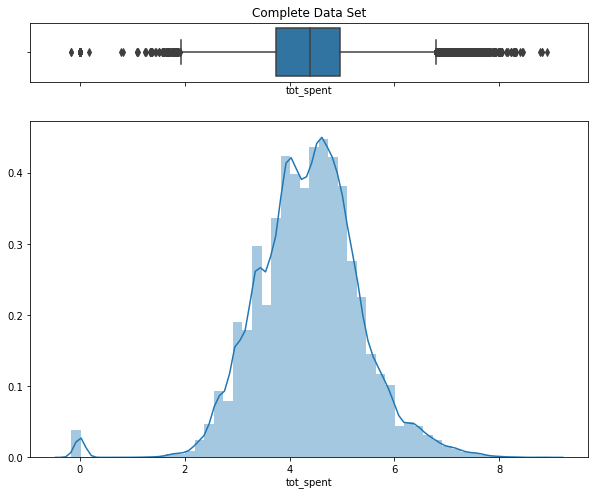

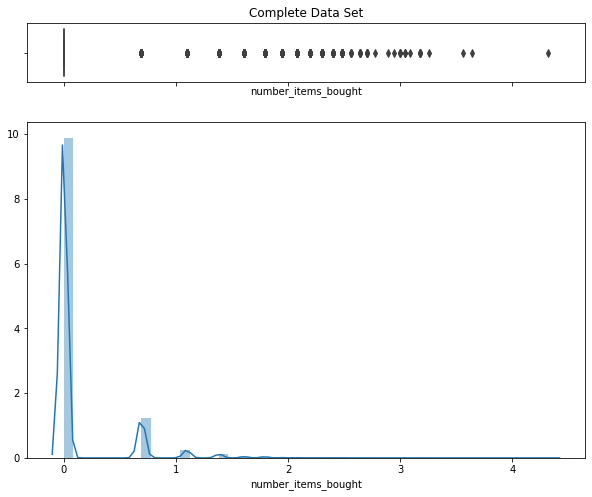

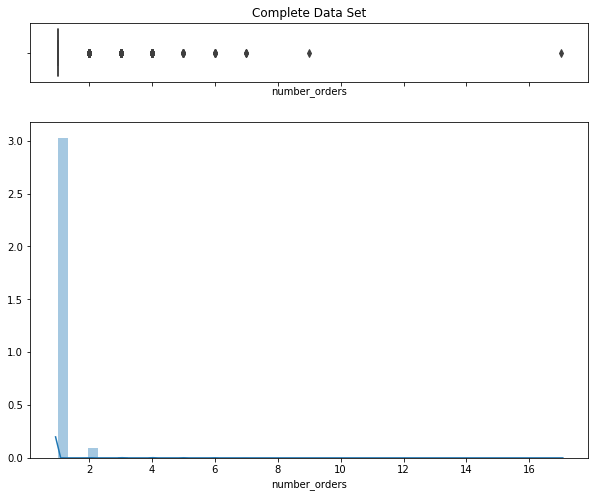

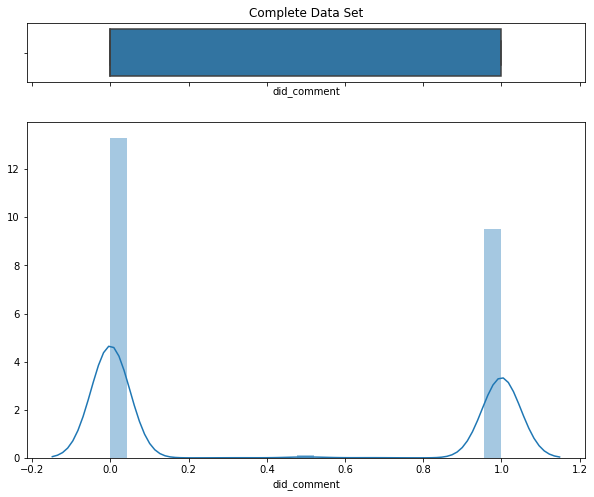

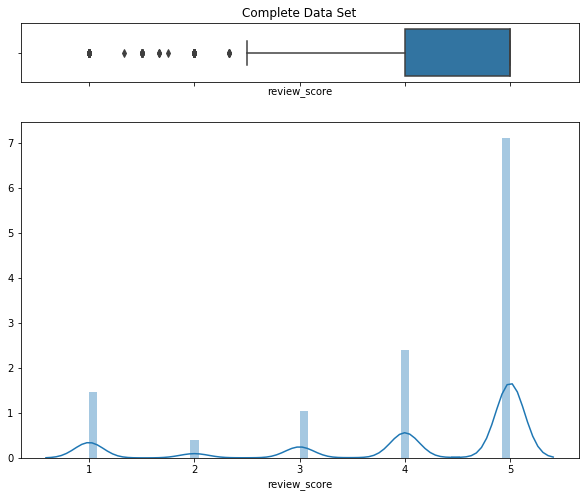

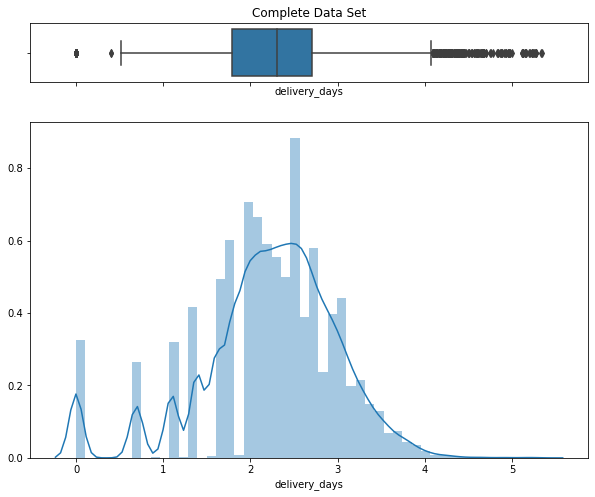

In [78]:
for column in created_columns:

    a4_dims = (10, 8)
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize=a4_dims)
    ax1 = sns.boxplot(complete_upd_customers[column], ax=ax_box).set_title("Complete Data Set")
    ax2 = sns.distplot(complete_upd_customers[column])